In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

In [119]:
accidents_by_driver2020 = pd.read_csv('/Users/anastasiasadova/Desktop/2020_accidents_fully_translated.csv')

In [120]:
accidents_by_driver2020.shape

(7595, 21)

In [121]:
accidents_by_driver2020

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,Descripcio_torn_english
0,2020S006254,-1,Desconegut,-1,Desconegut,-1,Corts / Arístides Maillol ...,NaN,Wednesday,2020,...,December,30,9,Lack of precaution when reversing,Morning,426626.85,4581292.09,2.122513,41.379807,NaN
1,2020S001630,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes / Castillejos ...,NaN,Wednesday,2020,...,March,4,14,Not respecting distances,Afternoon,431937.47,4583875.38,2.185727,41.403541,NaN
2,2020S001281,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,871,Wednesday,2020,...,February,19,22,Disobeying traffic lights,Night,432561.42,4584522.58,2.193119,41.409423,NaN
3,2020S001227,-1,Desconegut,-1,Desconegut,-1,A Zona Franca / Número 3 Zona Franca ...,NaN,Tuesday,2020,...,February,18,10,Lack of attention while driving,Morning,428020.43,4576283.26,2.139771,41.334820,NaN
4,2020S002367,-1,Desconegut,-1,Desconegut,-1,Molins de Rei ...,K60,Saturday,2020,...,May,30,12,Others,Morning,422891.03,4584730.23,2.077403,41.410423,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,2020S000242,8,Nou Barris,44,Vilapicina i la Torre Llobeta,111704,Escòcia,0086 0086,Sunday,2020,...,January,12,20,Others,Afternoon,431514.05,4586864.21,2.180323,41.430424,NaN
7591,2020S001025,8,Nou Barris,46,el Turó de la Peira,54000,Cadí,0022 0022,Monday,2020,...,February,10,9,Lack of precaution when reversing,Morning,430607.68,4587157.78,2.169443,41.432991,NaN
7592,2020S000035,8,Nou Barris,45,Porta,289852,Rosselló i Porcel,0002 0002,Friday,2020,...,January,3,12,Others,Morning,431855.93,4587772.72,2.184312,41.438636,NaN
7593,2020S003737,8,Nou Barris,45,Porta,256401,Pintor Alsamora,0001 0001,Wednesday,2020,...,August,19,19,Not determined,Afternoon,431781.49,4587486.66,2.183454,41.436053,NaN


In [122]:
#extra columns was created so I needed to delete it
accidents_by_driver2020 = accidents_by_driver2020.drop(columns=['Descripcio_torn_english'])

In [123]:
accidents_by_driver2020 = accidents_by_driver2020.drop_duplicates()
accidents_by_driver2020.shape 

(7595, 20)

In [124]:
accidents_by_driver2020.isnull().sum()

Numero_expedient              0
Codi_districte                0
Nom_districte                 0
Codi_barri                    0
Nom_barri                     0
Codi_carrer                   0
Nom_carrer                    0
Num_postal                    6
Descripcio_dia_setmana        0
NK_Any                        0
Mes_any                       0
Nom_mes                       0
Dia_mes                       0
Hora_dia                      0
Descripcio_torn               0
Descripcio_causa_conductor    0
Coordenada_UTM_X_ED50         0
Coordenada_UTM_Y_ED50         0
Longitud                      0
Latitud                       0
dtype: int64

In [125]:
accidents_by_driver2020 = barcelona_accidents_by_driver2020.dropna()

In [126]:
#Here is the code to create a datime column from 4 columns we hade before:
barcelona_accidents_by_driver2020['datetime'] = pd.to_datetime(
    barcelona_accidents_by_driver2020['NK_Any'].astype(str) + ' ' +
    barcelona_accidents_by_driver2020['Nom_mes'] + ' ' +
    barcelona_accidents_by_driver2020['Dia_mes'].astype(str) + ' ' +
    barcelona_accidents_by_driver2020['Hora_dia'].astype(str) + ':00',
    errors='coerce'  
)

In [127]:
barcelona_accidents_by_driver2020.dtypes

Numero_expedient                      object
Codi_districte                         int64
Nom_districte                         object
Codi_barri                             int64
Nom_barri                             object
Codi_carrer                            int64
Nom_carrer                            object
Num_postal                            object
Descripcio_dia_setmana                object
NK_Any                                 int64
Mes_any                                int64
Nom_mes                               object
Dia_mes                                int64
Hora_dia                               int64
Descripcio_causa_conductor            object
Descripcio_torn                       object
Coordenada_UTM_X_ED50                float64
Coordenada_UTM_Y_ED50                float64
Longitud                             float64
Latitud                              float64
datetime                      datetime64[ns]
dtype: object

In [128]:
accidents_by_driver2020.columns
# there was a space in num postal and I could not delete it

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes',
       'Hora_dia', 'Descripcio_causa_conductor', 'Descripcio_torn',
       'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud', 'Latitud',
       'datetime'],
      dtype='object')

In [129]:
# Specify the columns to drop
columns_to_drop = ['Codi_districte', 'Codi_barri', 'Codi_carrer', 'Num_postal ']

# Drop the columns
accidents_by_driver2020= accidents_by_driver2020.drop(columns=columns_to_drop)

# Verify the changes
accidents_by_driver2020.head()

,Numero_expedient,Nom_districte,Nom_barri,Nom_carrer,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_causa_conductor,Descripcio_torn,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,datetime
2,2020S001281,Desconegut,Desconegut,Corts Catalanes ...,Wednesday,2020,2,February,19,22,Disobeying traffic lights,Night,432561.42,4584522.58,2.193119,41.409423,2020-02-19 22:00:00
4,2020S002367,Desconegut,Desconegut,Molins de Rei ...,Saturday,2020,5,May,30,12,Others,Morning,422891.03,4584730.23,2.077403,41.410423,2020-05-30 12:00:00
8,2020S005723,Sant Martí,el Camp de l'Arpa del Clot,Independència,Wednesday,2020,12,December,2,13,Others,Morning,431461.53,4584551.41,2.179957,41.409589,2020-12-02 13:00:00
9,2020S000847,Sant Martí,el Camp de l'Arpa del Clot,Còrsega,Tuesday,2020,2,February,4,6,Lack of attention while driving,Morning,431597.10,4585085.49,2.181518,41.414411,2020-02-04 06:00:00
10,2020S003120,Sant Martí,el Camp de l'Arpa del Clot,Independència,Monday,2020,7,July,13,14,Disobeying traffic lights,Afternoon,431372.38,4585035.95,2.178835,41.413946,2020-07-13 14:00:00


# Define the new column names as a dictionary
columns_rename = {
    'Numero_expedient': 'Case_Number',
    'Nom_districte': 'District_Name',
    'Nom_barri': 'Neighborhood_Name',
    'Nom_carrer': 'Street_Name',
    'Descripcio_dia_setmana': 'Day_of_Week',
    'NK_Any': 'Year',
    'Mes_any': 'Month_Number',
    'Nom_mes': 'Month_Name',
    'Dia_mes': 'Day_of_Month',
    'Hora_dia': 'Hour_of_Day',
    'Descripcio_torn': 'Driver_Cause_Description',
    'Descripcio_causa_conductor': 'Shift_Description'
}

# Rename the columns in the DataFrame
accidents_by_driver2020 = accidents_by_driver2020.rename(columns=columns_rename)

# Verify the changes
accidents_by_driver2020 !!!!!!!!!!! change columns driver cause and shift!!!!

In [118]:
for column in accidents_by_driver2020.columns:
    unique_values = accidents_by_driver2020[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in column 'Case_Number':
['2020S001281    ' '2020S002367    ' '2020S005723    ' ...
 '2020S001025    ' '2020S003737    ' '2020S000309    ']
--------------------------------------------------
Unique values in column 'District_Name':
['Desconegut' 'Sant Martí' 'Ciutat Vella' 'Eixample' 'Sants-Montjuïc'
 'Les Corts' 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu']
--------------------------------------------------
Unique values in column 'Neighborhood_Name':
['Desconegut' "el Camp de l'Arpa del Clot" 'el Clot'
 'Sant Martí de Provençals' 'el Besòs i el Maresme' 'la Verneda i la Pau'
 'Provençals del Poblenou' 'el Poblenou'
 'Diagonal Mar i el Front Marítim del Poblenou'
 'el Parc i la Llacuna del Poblenou' 'el Raval'
 'la Vila Olímpica del Poblenou' 'el Barri Gòtic'
 'Sant Pere, Santa Caterina i la Ribera' 'la Barceloneta' 'Sant Antoni'
 "la Nova Esquerra de l'Eixample" "l'Antiga Esquerra de l'Eixample"
 "la Dreta de l'Eixample" 'la Sagrada Famíli

In [99]:
# add dictionary because there some untranslated values 'Desconegut', check for more

In [100]:
# saved data set to a new csv file
accidents_by_driver2020.to_csv('/Users/anastasiasadova/Desktop/2020accidents_by_driver_edited.csv', index=False)

In [101]:
#reloaded the data from new csv file
#barcelona_accidents_by_driver2020 = pd.read_csv('/Users/anastasiasadova/Desktop/barcelona_accidents_by_driver2020.csv')

In [102]:
accidents_by_driver2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Year,Month_Number,Month_Name,Day_of_Month,Hour_of_Day,Shift_Description,Driver_Cause_Description,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,datetime
2,2020S001281,Desconegut,Desconegut,Corts Catalanes ...,Wednesday,2020,2,February,19,22,Disobeying traffic lights,Night,432561.42,4584522.58,2.193119,41.409423,2020-02-19 22:00:00
4,2020S002367,Desconegut,Desconegut,Molins de Rei ...,Saturday,2020,5,May,30,12,Others,Morning,422891.03,4584730.23,2.077403,41.410423,2020-05-30 12:00:00
8,2020S005723,Sant Martí,el Camp de l'Arpa del Clot,Independència,Wednesday,2020,12,December,2,13,Others,Morning,431461.53,4584551.41,2.179957,41.409589,2020-12-02 13:00:00
9,2020S000847,Sant Martí,el Camp de l'Arpa del Clot,Còrsega,Tuesday,2020,2,February,4,6,Lack of attention while driving,Morning,431597.10,4585085.49,2.181518,41.414411,2020-02-04 06:00:00
10,2020S003120,Sant Martí,el Camp de l'Arpa del Clot,Independència,Monday,2020,7,July,13,14,Disobeying traffic lights,Afternoon,431372.38,4585035.95,2.178835,41.413946,2020-07-13 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,2020S000242,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Sunday,2020,1,January,12,20,Others,Afternoon,431514.05,4586864.21,2.180323,41.430424,2020-01-12 20:00:00
7591,2020S001025,Nou Barris,el Turó de la Peira,Cadí,Monday,2020,2,February,10,9,Lack of precaution when reversing,Morning,430607.68,4587157.78,2.169443,41.432991,2020-02-10 09:00:00
7592,2020S000035,Nou Barris,Porta,Rosselló i Porcel,Friday,2020,1,January,3,12,Others,Morning,431855.93,4587772.72,2.184312,41.438636,2020-01-03 12:00:00
7593,2020S003737,Nou Barris,Porta,Pintor Alsamora,Wednesday,2020,8,August,19,19,Not determined,Afternoon,431781.49,4587486.66,2.183454,41.436053,2020-08-19 19:00:00


In [62]:
accidents_by_driver2020['District_Name'].value_counts()

Eixample               2150
Sant Martí              909
Sants-Montjuïc          854
Sarrià-Sant Gervasi     814
Horta-Guinardó          576
Les Corts               514
Sant Andreu             508
Nou Barris              478
Gràcia                  370
Ciutat Vella            355
Desconegut               61
Name: District_Name, dtype: int64

In [64]:
accidents_by_driver2020['Street_Name'].unique() # delete empty spaces??

array(['Corts Catalanes                                   ',
       'Molins de Rei                                     ',
       'Independència', 'Còrsega', 'Rosselló', 'Freser', 'Mallorca',
       'Meridiana', 'Rogent', 'Glòries Catalanes', 'Guipúscoa',
       'Provençals', 'Corts Catalanes', 'Sèquia Comtal', 'Andrade',
       'Fluvià', 'Huelva', 'Clot', 'Aragó', 'Espronceda',
       'Consell de Cent', 'Concili de Trento', 'Dos de Maig',
       'Litoral (Llobregat)', 'Eduard Maristany', 'Josep Narcís Roca',
       'Las Navas de Tolosa', 'Lope de Vega', 'Agricultura', 'Santander',
       'Prim', 'Cantàbria', 'Treball', 'Llull', 'Maresme', 'Sant Martí',
       'Selva de Mar', 'Bilbao', 'Pallars', 'Josep Pla', 'Veneçuela',
       'Bernat Metge', 'C-31', 'Calvell', 'Marítim de la Mar Bella',
       'Litoral (Besòs)', 'Taulat', 'Pere IV', 'Bac de Roda', 'Llacuna',
       'Ramon Turró', 'Badajoz', 'Antic de València', 'Pujades',
       'Diagonal', 'Garcia Fària', 'Rambla', 'Almogàvers', 'Sa

In [69]:
# Optionally, remove rows with blank strings in 'Street_Name'
# accidents_by_driver2020 = accidents_by_driver2020[accidents_by_driver2020['Street_Name'].str.strip() != '']
# its not chanching data set there are still empty values

In [73]:
# Group by 'District_Name', calculate the count, and sort by 'Accident_Count' in descending order
district_accidents = (
    accidents_by_driver2020.groupby('District_Name')
    .size()
    .reset_index(name='Accident_Count')
    .sort_values(by='Accident_Count', ascending=False)
)


district_accidents

,District_Name,Accident_Count
2,Eixample,2150
8,Sant Martí,909
9,Sants-Montjuïc,854
10,Sarrià-Sant Gervasi,814
4,Horta-Guinardó,576
5,Les Corts,514
7,Sant Andreu,508
6,Nou Barris,478
3,Gràcia,370
0,Ciutat Vella,355


In [74]:
district_accidents = district_accidents[district_accidents['District_Name'] != 'Desconegut']

In [75]:
least_accidents_by_district = district_accidents.sort_values(by='Accident_Count', ascending=False)

In [76]:
least_accidents_by_district

,District_Name,Accident_Count
2,Eixample,2150
8,Sant Martí,909
9,Sants-Montjuïc,854
10,Sarrià-Sant Gervasi,814
4,Horta-Guinardó,576
5,Les Corts,514
7,Sant Andreu,508
6,Nou Barris,478
3,Gràcia,370
0,Ciutat Vella,355


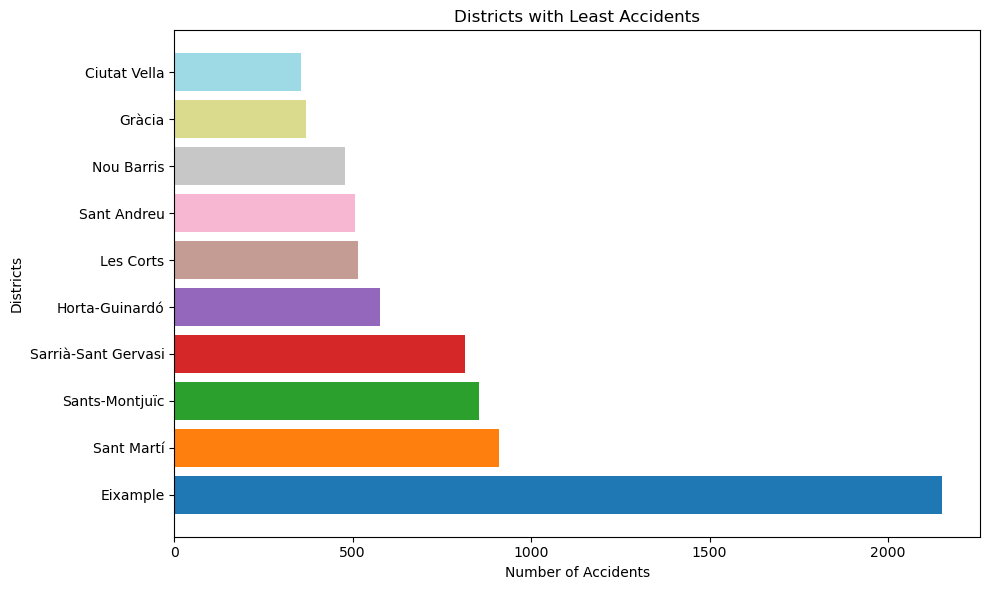

In [77]:
num_districts = len(least_accidents_by_district['District_Name'])
distinct_pastel_colors = plt.cm.tab20(np.linspace(0, 1, num_districts))

plt.figure(figsize=(10, 6))
plt.barh(
    least_accidents_by_district['District_Name'], 
    least_accidents_by_district['Accident_Count'], 
    color=distinct_pastel_colors
)
plt.title("Districts with Least Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Districts")
plt.tight_layout()
plt.show()

In [79]:
accidents_by_month = accidents_by_driver2020.groupby('Month_Name').size().reset_index(name='Accident_Count')

In [80]:
least_accidents_by_month = accidents_by_month.loc[accidents_by_month['Accident_Count'].idxmin()]

In [81]:
least_accidents_by_month

Month_Name        April
Accident_Count      128
Name: 0, dtype: object

In [28]:
# category_counts = accidents_by_driver2020['Descripcio_causa_conductor'].value_counts()

In [29]:
# top_10_categories = category_counts.head(10)

In [31]:
# top_10_categories  #replace unknown with not determined and others?

Lack of attention while driving        1619
Others                                 1132
Not respecting distances                826
Improper or careless turn               689
Disobeying traffic lights               630
Changing lanes without caution          537
Not determined                          494
Disobeying other signals                460
Unknown                                 255
Lack of precaution entering traffic     228
Name: Descripcio_causa_conductor, dtype: int64

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.title("Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Create a map centered at an average location in Barcelona

map_barcelona = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

#here we can add some details for example accidents by area or 5 most dangerous areas
map_barcelona.add_child(
    HeatMap(
        barcelona_accidents_by_driver2020[['Latitud','Longitud']]
    )
)